### GOES peak flare flux as a function of:

- __SRS regions__
    - CME Hale Class as markers
    
    
- __SMART regions__
    - CME Hale Class as markers

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
#=== Flare props ===========================================================================================================
dfs = df[['srs_hale', 'srs_area', 'goes_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Removing the row that contains the SRS area outlier (area=1.0)
dfs = dfs[(dfs[['srs_area']] != 1.0).all(axis=1)]

# Reindexing
dfs = dfs.reset_index(drop=True)

# Logging the goes flux and srs area for plotting
dfs['goes_flux'] = np.log10(dfs['goes_flux'])
dfs['srs_area'] = np.log10(dfs['srs_area'])

# Want to separate each class so that we can make each one a specific symbol
a = dfs.loc[dfs['srs_hale'] == 1.0]     # alpha
b = dfs.loc[dfs['srs_hale'] == 2.0]     # beta
bg = dfs.loc[dfs['srs_hale'] == 3.0]    # beta-gamma
bd = dfs.loc[dfs['srs_hale'] == 4.0]    # beta-delta
bgd = dfs.loc[dfs['srs_hale'] == 5.0]   # beta-gamma-delta
gd = dfs.loc[dfs['srs_hale'] == 6.0]    # gamma-delta

# Setting Hale Class colours
cmap = mpl.colors.ListedColormap(['crimson', 'darkblue', 'darkcyan', 'magenta', 'darkorange', 'black'])
bounds = [1, 2, 3, 4, 5, 6, 7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [4]:
#=== SMART Props ===========================================================================================================
dfa = df[['srs_hale', 'smart_total_area', 'goes_flux']]

# Removing the rows containing any NaN values
dfa = dfa.dropna(how='any')

# Reindexing
dfa = dfa.reset_index(drop=True)

# Logging the goes_flux and SMART total area for plotting
dfa['goes_flux'] = np.log10(dfa['goes_flux'])
dfa['smart_total_area'] = np.log10(dfa['smart_total_area'])

# Setting the marker symbols
a1 = dfa.loc[dfa['srs_hale'] == 1.0]    # alpha
b1 = dfa.loc[dfa['srs_hale'] == 2.0]    # beta
bg1 = dfa.loc[dfa['srs_hale'] == 3.0]   # beta-gamma
bd1 = dfa.loc[dfa['srs_hale'] == 4.0]   # beta-delta
bgd1 = dfa.loc[dfa['srs_hale'] == 5.0]  # beta-gamma-delta
gd1 = dfa.loc[dfa['srs_hale'] == 6.0]   # gamma-delta

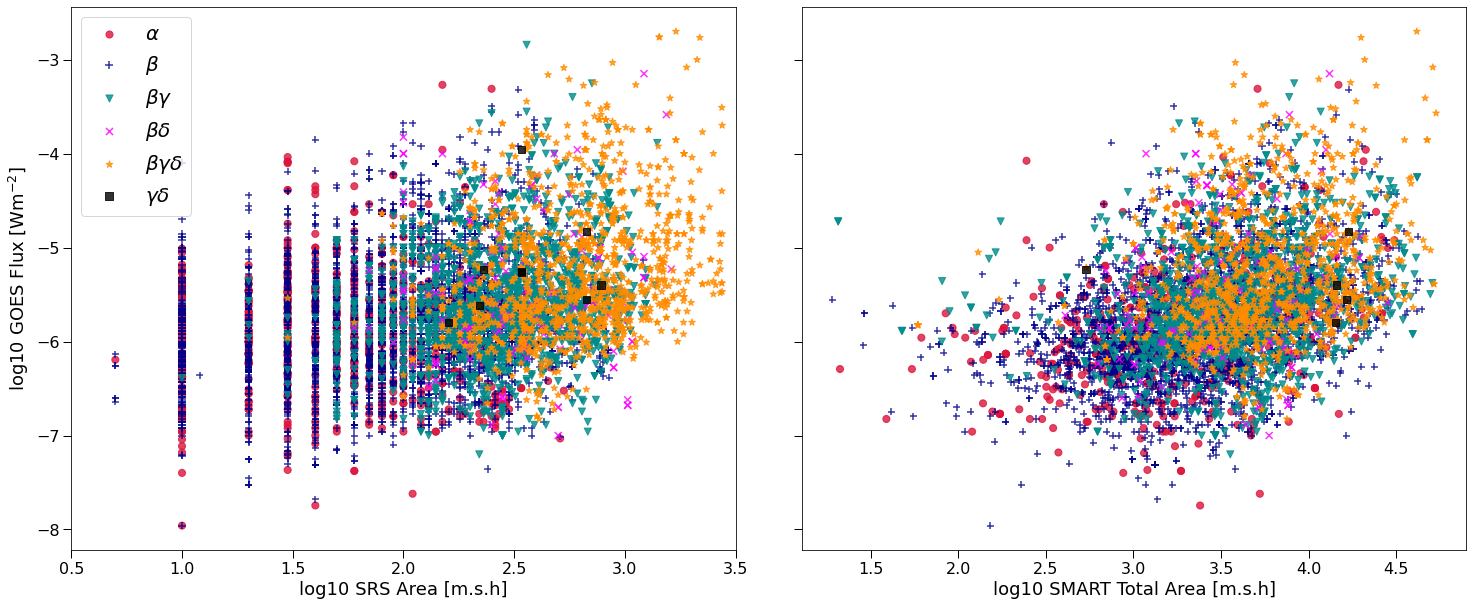

In [7]:
#=== PLOTTING ==================================================================================================================
plt.figure(figsize=[25, 10], facecolor='white')
plt.subplot(121)

# SRS
s1 = plt.scatter(x=a['srs_area'], y=a['goes_flux'], c=a['srs_hale'],
                 alpha=0.8, marker='o', cmap=cmap, norm=norm, label=r'$\alpha$', s=50)
s2 = plt.scatter(x=b['srs_area'], y=b['goes_flux'], c=b['srs_hale'],
                 alpha=0.8, marker='+', cmap=cmap, norm=norm, label=r'$\beta$', s=50)
s3 = plt.scatter(x=bg['srs_area'], y=bg['goes_flux'], c=bg['srs_hale'],
                 alpha=0.8, marker='v', cmap=cmap, norm=norm, label=r'$\beta \gamma$', s=50)
s4 = plt.scatter(x=bd['srs_area'], y=bd['goes_flux'], c=bd['srs_hale'],
                 alpha=0.8, marker='x', cmap=cmap, norm=norm, label=r'$\beta \delta$', s=50)
s5 = plt.scatter(x=bgd['srs_area'], y=bgd['goes_flux'], c=bgd['srs_hale'],
                 alpha=0.8, marker='*', cmap=cmap, norm=norm, label=r'$\beta \gamma \delta$', s=50)
s6 = plt.scatter(x=gd['srs_area'], y=gd['goes_flux'], c=gd['srs_hale'],
                 alpha=0.8, marker='s', cmap=cmap, norm=norm, label=r'$\gamma \delta$', s=50)

plt.xlim(0.5, 3.5)
plt.xlabel("log10 SRS Area [m.s.h]", fontsize=18)
plt.ylabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=18, labelpad=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax1 = plt.gca()
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

# Legend
#leg = plt.legend(loc="best", title="Hale Class", fontsize=18)
#plt.setp(leg.get_title(), fontsize=18)
leg = plt.legend(loc="best", fontsize=20)
leg.legendHandles[0].set_color('crimson')
leg.legendHandles[1].set_color('darkblue')
leg.legendHandles[2].set_color('darkcyan')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('darkorange')
leg.legendHandles[5].set_color('black')


# SMART
plt.subplot(122)

ss1 = plt.scatter(x=a1['smart_total_area'], y=a1['goes_flux'], c=a1['srs_hale'],
                 alpha=0.8, marker='o', cmap=cmap, norm=norm, label=r'$\alpha$', s=50)

ss2 = plt.scatter(x=b1['smart_total_area'], y=b1['goes_flux'], c=b1['srs_hale'],
                 alpha=0.8, marker='+', cmap=cmap, norm=norm, label=r'$\beta$', s=50)

ss3 = plt.scatter(x=bg1['smart_total_area'], y=bg1['goes_flux'], c=bg1['srs_hale'],
                 alpha=0.8, marker='v', cmap=cmap, norm=norm, label=r'$\beta \gamma$', s=50)

ss4 = plt.scatter(x=bd1['smart_total_area'], y=bd1['goes_flux'], c=bd1['srs_hale'],
                 alpha=0.8, marker='x', cmap=cmap, norm=norm, label=r'$\beta \delta$', s=50)

ss5 = plt.scatter(x=bgd1['smart_total_area'], y=bgd1['goes_flux'], c=bgd1['srs_hale'],
                 alpha=0.8, marker='*', cmap=cmap, norm=norm, label=r'$\beta \gamma \delta$', s=50)

ss6 = plt.scatter(x=gd1['smart_total_area'], y=gd1['goes_flux'], c=gd1['srs_hale'],
                 alpha=0.8, marker='s', cmap=cmap, norm=norm, label=r'$\gamma \delta$', s=50)

plt.xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
plt.ylabel('')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax2 = plt.gca()
ax2.tick_params(axis='y', labelleft=False)
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

plt.subplots_adjust(wspace=0.1)
#plt.savefig('hale_flux.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()